**Estelle Doriot**

_NSI Tale_

---

# Exercices: Programmation orientée objet

---


### Exercice n°

Écrire une classe `Personnage`, avec son nom et ses points de vie comme attribut. Ajouter une méthode `combat(self,other)` qui diminue de façon aléatoire les points de vie de l’un des personnages.


In [1]:
from random import randint


class Personnage:
    def __init__(self, nom: str, pv: int) -> None:
        self.nom = nom
        self.pv = pv

    def combat(self, other) -> None:
        if randint(1, 2) == 1:
            self.pv -= 5
        else:
            other.pv -= 5

### Exercice n° (Compte bancaire)

Écrire une classe `CompteBancaire`. Les objets sont initialisés avec le nom du titulaire
et le solde. L’argument solde doit être facultatif et avoir une valeur prédéfinie zéro.
Ajouter deux méthodes `depot(self,somme)` et `retrait(self,somme)` pour changer le
solde. Ajouter une méthode `affiche(self)` qui montre le solde courant.


In [2]:
class CompteBancaire:
    def __init__(self, titulaire: str, solde: float = 0) -> None:
        self.titulaire = titulaire
        self.solde = solde

    def depot(self, somme: float) -> None:
        self.solde += somme

    def retrait(self, somme: float) -> None:
        self.solde -= somme

    def affiche(self) -> None:
        print(f"Le solde du compte est: {self.solde}.")

### Exercice n° (Nombres rationnels)

Python comme la plupart des langages ne dispose pas d’une structure de données de type
rationnel (des fractions..) Nous allons en créer une ...(même s’il est certain que cela existe déjà...)

Le cahier des charges
On doit créer une classe Rationnel dont les instances auront les attributs numerateur et
denominateur(celui-ci ne pourra être nul!!) et des méthodes pour:

- Simplifier la fraction et normaliser son écriture
- Additionner deux fractions
- Soustraire deux fractions
- Multiplier et diviser deux fractions

La fraction $\frac{12}{-15}$ doit s’écrire $\frac{−4}{5}$. Il y a eu simplification par le PGCD de 12 et 15 et transfert du signe au numérateur.

Il nous faudra:

- Une fonction qui calcule le PGCD
- Une méthode pour simplifier et normaliser la fraction.

1. Ecrire une classe `Rationnel` avec son constructeur et la méthode `__repr__` pour afficher la fraction $\frac{4}{5}$ sous la forme: `4/5`. On déclenchera une erreur lorsque le dénominateur est nul.


In [3]:
class Rationnel:
    def __init__(self, num: int, denom: int = 1) -> None:
        assert denom != 0, "Le dénominateur ne peut pas être nul"
        self.num = num
        self.denom = denom

    def __repr__(self) -> str:
        return f"{self.num}/{self.denom}"


f1 = Rationnel(12, -15)
print(f1)

f2 = Rationnel(7)
print(f2)

12/-15
7/1


2. Simplification de la fraction : Pour cela il nous faut une fonction qui calcule le PGCD de deux entiers.

a. Écrire une fonction `pgcd(x: int, y: int) -> int` qui retourne le pgcd des entiers x et y passés en paramètres.


In [4]:
def pgcd(x: int, y: int) -> int:
    while y != 0:
        x, y = y, x % y
    return x


assert pgcd(15, 12) == 3
assert pgcd(11, 15) == 1

b. Rajouter une méthode `normalise` qui simplifie la fraction. Puis rajouter un appel à la méthode `normalise` dans le constructeur pour que cette opération soit faite automatiquement.


In [5]:
class Rationnel:
    def __init__(self, num: int, denom: int = 1) -> None:
        assert denom != 0, "Le dénominateur ne peut pas être nul"
        self.num = num
        self.denom = denom
        self.normalise()

    def __repr__(self) -> str:
        return f"{self.num}/{self.denom}"

    def normalise(self) -> None:
        g = pgcd(self.num, self.denom)
        self.num //= g
        self.denom //= g
        if self.denom < 0:
            self.num = -self.num
            self.denom = -self.denom


f1 = Rationnel(12, -15)
print(f1)

f2 = Rationnel(7)
print(f2)

-4/5
7/1


3. Pour pouvoir utiliser le symbole `+` pour faire une addition entre deux nombres rationnels, il faut écrire une méthode `__add__(self, other)` qui renvoie un nombre rationnel qui est le résultat de l'addition de deux fractions.

On vérifiera que $\frac{2}{7} + \frac{5}{3} = \frac{41}{21}$


In [6]:
class Rationnel:
    def __init__(self, num: int, denom: int = 1) -> None:
        assert denom != 0, "Le dénominateur ne peut pas être nul"
        self.num = num
        self.denom = denom
        self.normalise()

    def __repr__(self) -> str:
        return f"{self.num}/{self.denom}"

    def __add__(self, other: Rationnel) -> Rationnel:
        return Rationnel(
            self.num * other.denom + other.num * self.denom, self.denom * other.denom
        )

    def normalise(self) -> None:
        g = pgcd(self.num, self.denom)
        self.num //= g
        self.denom //= g
        if self.denom < 0:
            self.num = -self.num
            self.denom = -self.denom


f1 = Rationnel(2, 7)
f2 = Rationnel(5, 3)
print(f1 + f2)

41/21


4. Effectuer les autres opérations.

- Pour la soustraction `-` on utilise la fonction : `__sub__(self, other)`
- Pour la multiplication `*` on utilise la fonction : `__mul__(self, other)`
- Pour la division `/` ce sera : `__truediv__(self, other)`, il faudra gérer la division par 0


In [7]:
class Rationnel:
    def __init__(self, num: int, denom: int = 1) -> None:
        assert denom != 0, "Le dénominateur ne peut pas être nul"
        self.num = num
        self.denom = denom
        self.normalise()

    def __repr__(self) -> str:
        return f"{self.num}/{self.denom}"

    def __add__(self, other: Rationnel) -> Rationnel:
        return Rationnel(
            self.num * other.denom + other.num * self.denom, self.denom * other.denom
        )

    def __sub__(self, other: Rationnel) -> Rationnel:
        return Rationnel(
            self.num * other.denom - other.num * self.denom, self.denom * other.denom
        )

    def __mul__(self, other: Rationnel) -> Rationnel:
        return Rationnel(self.num * other.num, self.denom * other.denom)

    def __truediv__(self, other: Rationnel) -> Rationnel:
        return Rationnel(self.num * other.denom, self.denom * other.num)

    def normalise(self) -> None:
        g = pgcd(self.num, self.denom)
        self.num //= g
        self.denom //= g
        if self.denom < 0:
            self.num = -self.num
            self.denom = -self.denom


f1 = Rationnel(2, 7)
f2 = Rationnel(21, 12)
print(f"{f1} + {f2} = {f1 + f2}")
print(f"{f1} - {f2} = {f1 - f2}")
print(f"{f1} * {f2} = {f1 * f2}")
print(f"{f1} / {f2} = {f1 / f2}")

2/7 + 7/4 = 57/28
2/7 - 7/4 = -41/28
2/7 * 7/4 = 1/2
2/7 / 7/4 = 8/49


5. Le nombre d’Euler : $e = 2,718281....$ vérifie l’égalité suivante:

$e = \frac{1}{1} + \frac{1}{1 \times 2} + \frac{1}{1 \times 2 \times 3} + \dots + \frac{1}{1 \times 2 \times 3 \times \dots \times n} + \dots$

En utilisant la classe Rationnel, écrire une fonction `nombre_euler(n: int) -> Rationnel` qui renvoie une fraction qui permet d’obtenir une approximation de `e`.


In [8]:
def euler(n: int) -> Rationnel:
    e = Rationnel(0)
    terme = Rationnel(1)
    for i in range(1, n + 1):
        terme *= Rationnel(1, i)
        e += terme
    return e


euler_approx = euler(10)
print(euler_approx)
print(euler_approx.num / euler_approx.denom)

6235301/3628800
1.7182818011463845


6. Toujours en utilisant la classe Rationnel, écrire une fonction qui permet d’obtenir une
   fraction donnant une approximation du nombre `pi` par la formule:

$\pi = 4 \times (1 − \frac{1}{3} + \frac{1}{5} − \frac{1}{7} + \frac{1}{9} − \dots + \frac{(−1)^n}{2n + 1} + \dots)$


In [9]:
def pi(n: int) -> Rationnel:
    pi_approx = Rationnel(0)
    for i in range(n + 1):
        pi_approx += Rationnel(1, 2 * i + 1) if i % 2 == 0 else Rationnel(-1, 2 * i + 1)
    return Rationnel(4) * pi_approx


pi_approx = pi(100)
print(pi_approx)
print(pi_approx.num / pi_approx.denom)

8304519683050930315868351728478581371218237057610107475627876427688700564658702331560588/2635106162757236442495826303084698495565581115509040892412867358728390766099042109898375
3.1514934010709905


### Exercice n° (Points)

Soit $M$ un point du plan $(\vec{x},\vec{y})$ et de coordonnées cartésiennes $x_M$ et $y_M$ dans un repère $R (0, \vec{x}, \vec{y})$. On peut considérer le point comme un objet géométrique, possédant 2 attributs : ses coordonnées dans R.

1. Créer une classe `Point` avec son constructeur, qui représente un point de R.


In [10]:
class Point:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

2. Définir la méthode `__repr__` de la classe `Point` pour que le point M de coordonnées $(1, 2)$ s'affiche `P(1, 2)`.


In [11]:
class Point:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"P({self.x}, {self.y})"


M = Point(1, 2)
print(M)

P(1, 2)


3. Écrire une méthode `distance(self, p)` admettant 2 objets de type Point (dont l’objet lui-même) comme paramètres et renvoyant la valeur de la distance entre ces deux points. Vérifier que la distance entre les points $(1, 4)$ et $(5, 1)$ est $5.0$.


In [12]:
from math import sqrt


class Point:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"P({self.x}, {self.y})"

    def distance(self, p: Point) -> float:
        return sqrt((self.x - p.x) ** 2 + (self.y - p.y) ** 2)


M = Point(1, 4)
N = Point(5, 1)

assert M.distance(N) == 5.0

4. Pour afficher ce point graphiquement on peut utiliser le module `pylab`:

```python
import pylab
# tracé d'un simple point :
pylab.plot(x, y, ".")
# pour placer toute la figure dans un repère orthonormé :
pylab.axis('scaled')
# affichage de la figure :
pylab.show()
```

Rajouter à la classe Point une méthode `dessiner` permettant d’afficher graphiquement les instances de `Point` dans un espace orthonormé.

On vérifiera que les instructions suivantes

```python
p1 = Point(4, 4)
p1.dessiner()
p2 = Point(2, 5)
p2.dessiner()
p3 = Point(-1, 2)
p3.dessiner()
```

affichent :

![](troispoints.png)


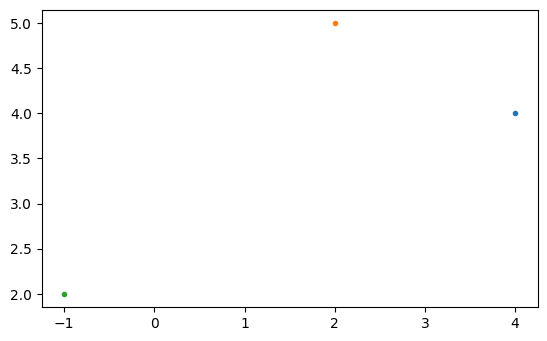

In [14]:
from math import sqrt
import pylab


class Point:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"P({self.x}, {self.y})"

    def distance(self, p: Point) -> float:
        return sqrt((self.x - p.x) ** 2 + (self.y - p.y) ** 2)

    def dessiner(self) -> None:
        pylab.plot(self.x, self.y, ".")


p1 = Point(4, 4)
p1.dessiner()
p2 = Point(2, 5)
p2.dessiner()
p3 = Point(-1, 2)
p3.dessiner()

pylab.axis("scaled")
pylab.show()

5. De même que pour le point, on peut définir un vecteur par ses 2 coordonnées dans le repère R. Ecrire une classe `Vecteur`.


In [15]:
class Vecteur:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

6. Et pour en tracer un représentant dans le plan, on utilise la fonction `pylab.quiver`:

```python
pylab.quiver(x0, y0, x, y, units='xy', scale=1)
```

Implémenter une méthode dessiner, admettant un seul paramètre `p` (en plus de l’objet lui même bien sûr) de type `Point` et permettant d’afficher un représentant de ce vecteur au point `p`.

Ainsi, si on rajoute les commandes suivantes aux précédentes :

```python
v1 = Vecteur(1,2)
v1.dessiner(p3)

v2 = Vecteur(-3,-1)
v2.dessiner(p1)
v2.dessiner(p2)
```

On doit voir apparaitre :

![](troisfleches.png)


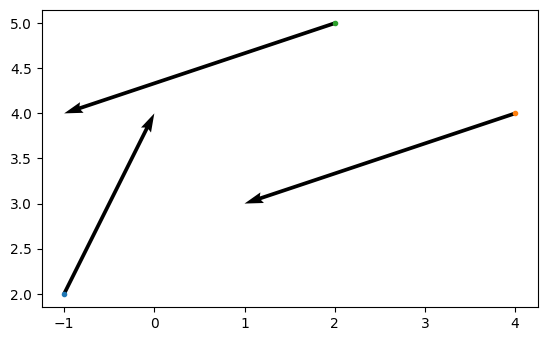

In [16]:
import pylab


class Vecteur:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def dessiner(self, p: Point) -> None:
        p.dessiner()
        pylab.quiver(p.x, p.y, self.x, self.y, units="xy", scale=1)


v1 = Vecteur(1, 2)
v1.dessiner(p3)
v2 = Vecteur(-3, -1)
v2.dessiner(p1)
v2.dessiner(p2)

pylab.axis("scaled")
pylab.show()

7. Parmi les noms de méthodes spéciales, il en existe une permettant d’utiliser le symbole « + » pour faire une « somme » de deux objets, de mêmes types ou pas : la méthode `__add__()`.

Écrire la méthode `__add__`, acceptant comme argument (en plus du vecteur lui-même, `self`) un autre vecteur `v`, et en renvoyant le vecteur somme.

Le résultat doit permettre de faire ça (après avoir implémenté une méthode `__repr__()`comme pour le point) :

```python
>>> u = Vecteur(1, 5)
>>> v = Vecteur(1, 4)
>>> u + v
v(2, 9)
```


In [17]:
import pylab


class Vecteur:
    def __init__(self, x: float, y: float) -> None:
        self.x = x
        self.y = y

    def __repr__(self) -> str:
        return f"v({self.x}, {self.y})"

    def __add__(self, v: Vecteur) -> Vecteur:
        return Vecteur(self.x + v.x, self.y + v.y)

    def dessiner(self, p: Point) -> None:
        p.dessiner()
        pylab.quiver(p.x, p.y, self.x, self.y, units="xy", scale=1)


u = Vecteur(1, 5)
v = Vecteur(1, 4)
print(u + v)

v(2, 9)
